# GelMA SMPEG2 EGFP

In [1]:
import pandas as pd

In [2]:
from sklearn import preprocessing

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Parameters and Data Import

In [4]:
pi = 3.141592653589793238

In [5]:
GelMA26 = pd.read_csv("GelMA26.csv")
GelMA26_H = 6.44
GelMA26_D = 18.69/1000
GelMA26_R = GelMA26_D/2

GelMA27 = pd.read_csv("GelMA27.csv")
GelMA27_H = 5.70
GelMA27_D = 18.65/1000
GelMA27_R = GelMA27_D/2

GelMA28 = pd.read_csv("GelMA28.csv")
GelMA28_H = 5.42
GelMA28_D = 18.99/1000
GelMA28_R = GelMA28_D/2

GelMA29 = pd.read_csv("GelMA29.csv")
GelMA29_H = 5.45
GelMA29_D = 18.39/1000
GelMA29_R = GelMA29_D/2

GelMA30 = pd.read_csv("GelMA30.csv")
GelMA30_H = 5.09
GelMA30_D = 18.96/1000
GelMA30_R = GelMA30_D/2


In [6]:
GelMA26.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA27.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA28.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA29.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA30.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

In [7]:
GelMA30

,Time [sec],Force [N],Stroke [mm]
0,0.00,-0.000715,0.000000
1,0.01,0.000079,0.000033
2,0.02,-0.000079,0.000033
3,0.03,-0.000079,0.000067
4,0.04,0.000397,0.000133
...,...,...,...
20503,205.03,5.645752,3.417167
20504,205.04,5.647977,3.417300
20505,205.05,5.650123,3.417467
20506,205.06,5.653461,3.417600


## Stress and Strain Calculation

In [8]:
GelMA26['Engineering Strain'] = GelMA26['Stroke [mm]']/ GelMA26_H 
GelMA26['Stress [Pa]'] = GelMA26['Force [N]']/(pi*GelMA26_R**2)

GelMA27['Engineering Strain'] = GelMA27['Stroke [mm]']/ GelMA27_H 
GelMA27['Stress [Pa]'] = GelMA27['Force [N]']/(pi*GelMA27_R**2)

GelMA28['Engineering Strain'] = GelMA28['Stroke [mm]']/ GelMA28_H 
GelMA28['Stress [Pa]'] = GelMA28['Force [N]']/(pi*GelMA28_R**2)

GelMA29['Engineering Strain'] = GelMA29['Stroke [mm]']/ GelMA29_H 
GelMA29['Stress [Pa]'] = GelMA29['Force [N]']/(pi*GelMA29_R**2)

GelMA30['Engineering Strain'] = GelMA30['Stroke [mm]']/ GelMA30_H 
GelMA30['Stress [Pa]'] = GelMA30['Force [N]']/(pi*GelMA30_R**2)



GelMA26['Engineering Strain'] = GelMA26['Stroke [mm]']/ GelMA26_H 
GelMA26['Stress [kPa]'] = (GelMA26['Force [N]']/(pi*GelMA26_R**2))/1000

GelMA27['Engineering Strain'] = GelMA27['Stroke [mm]']/ GelMA27_H 
GelMA27['Stress [kPa]'] = (GelMA27['Force [N]']/(pi*GelMA27_R**2))/1000

GelMA28['Engineering Strain'] = GelMA28['Stroke [mm]']/ GelMA28_H 
GelMA28['Stress [kPa]'] = (GelMA28['Force [N]']/(pi*GelMA28_R**2))/1000

GelMA29['Engineering Strain'] = GelMA29['Stroke [mm]']/ GelMA29_H 
GelMA29['Stress [kPa]'] = (GelMA29['Force [N]']/(pi*GelMA29_R**2))/1000

GelMA30['Engineering Strain'] = GelMA30['Stroke [mm]']/ GelMA30_H 
GelMA30['Stress [kPa]'] = (GelMA30['Force [N]']/(pi*GelMA30_R**2))/1000

In [9]:
GelMA30

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa]
0,0.00,-0.000715,0.000000,0.000000,-2.533348,-0.002533
1,0.01,0.000079,0.000033,0.000007,0.281483,0.000281
2,0.02,-0.000079,0.000033,0.000007,-0.281483,-0.000281
3,0.03,-0.000079,0.000067,0.000013,-0.281483,-0.000281
4,0.04,0.000397,0.000133,0.000026,1.407415,0.001407
...,...,...,...,...,...,...
20503,205.03,5.645752,3.417167,0.671349,19996.558116,19.996558
20504,205.04,5.647977,3.417300,0.671375,20004.438792,20.004439
20505,205.05,5.650123,3.417467,0.671408,20012.039660,20.012040
20506,205.06,5.653461,3.417600,0.671434,20023.862445,20.023862


## Cutting the Data 

In [10]:
GelMA26_cut = GelMA26[~(GelMA26['Force [N]']<= 0.1)]

GelMA27_cut = GelMA27[~(GelMA27['Force [N]']<= 0.1)]

GelMA28_cut = GelMA28[~(GelMA28['Force [N]']<= 0.1)]

GelMA29_cut = GelMA29[~(GelMA29['Force [N]']<= 0.1)]

GelMA30_cut = GelMA30[~(GelMA30['Force [N]']<= 0.1)]

In [11]:
GelMA30_cut

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa]
3181,31.81,0.100136,0.530100,0.104145,354.668668,0.354669
3182,31.82,0.100533,0.530300,0.104185,356.076210,0.356076
3183,31.83,0.100931,0.530467,0.104217,357.483398,0.357483
3184,31.84,0.101487,0.530633,0.104250,359.453744,0.359454
3185,31.85,0.101725,0.530833,0.104289,360.298482,0.360298
...,...,...,...,...,...,...
20503,205.03,5.645752,3.417167,0.671349,19996.558116,19.996558
20504,205.04,5.647977,3.417300,0.671375,20004.438792,20.004439
20505,205.05,5.650123,3.417467,0.671408,20012.039660,20.012040
20506,205.06,5.653461,3.417600,0.671434,20023.862445,20.023862


In [12]:
GelMA26_cut['Strain Normalised'] = GelMA26_cut['Engineering Strain'] - GelMA26_cut.iloc[0]['Engineering Strain']

GelMA27_cut['Strain Normalised'] = GelMA27_cut['Engineering Strain'] - GelMA27_cut.iloc[0]['Engineering Strain']

GelMA28_cut['Strain Normalised'] = GelMA28_cut['Engineering Strain'] - GelMA28_cut.iloc[0]['Engineering Strain']

GelMA29_cut['Strain Normalised'] = GelMA29_cut['Engineering Strain'] - GelMA29_cut.iloc[0]['Engineering Strain']

GelMA30_cut['Strain Normalised'] = GelMA30_cut['Engineering Strain'] - GelMA30_cut.iloc[0]['Engineering Strain']

GelMA30_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2162/2829973083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA26_cut['Strain Normalised'] = GelMA26_cut['Engineering Strain'] - GelMA26_cut.iloc[0]['Engineering Strain']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2162/2829973083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA27_cut['Strain Normalised'] = GelMA27_cut['Engineering Strain'] - GelMA27_cut.iloc[0]['Engineering Strain']
/var/folders/97/y1n8_jns6rl_dk0y

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised
3181,31.81,0.100136,0.530100,0.104145,354.668668,0.354669,0.000000
3182,31.82,0.100533,0.530300,0.104185,356.076210,0.356076,0.000039
3183,31.83,0.100931,0.530467,0.104217,357.483398,0.357483,0.000072
3184,31.84,0.101487,0.530633,0.104250,359.453744,0.359454,0.000105
3185,31.85,0.101725,0.530833,0.104289,360.298482,0.360298,0.000144
...,...,...,...,...,...,...,...
20503,205.03,5.645752,3.417167,0.671349,19996.558116,19.996558,0.567204
20504,205.04,5.647977,3.417300,0.671375,20004.438792,20.004439,0.567230
20505,205.05,5.650123,3.417467,0.671408,20012.039660,20.012040,0.567263
20506,205.06,5.653461,3.417600,0.671434,20023.862445,20.023862,0.567289


In [13]:
GelMA26_cut['Stroke Normalised'] = GelMA26_cut['Stroke [mm]'] - GelMA26_cut.iloc[0]['Stroke [mm]']

GelMA27_cut['Stroke Normalised'] = GelMA27_cut['Stroke [mm]'] - GelMA27_cut.iloc[0]['Stroke [mm]']

GelMA28_cut['Stroke Normalised'] = GelMA28_cut['Stroke [mm]'] - GelMA28_cut.iloc[0]['Stroke [mm]']

GelMA29_cut['Stroke Normalised'] = GelMA29_cut['Stroke [mm]'] - GelMA29_cut.iloc[0]['Stroke [mm]']

GelMA30_cut['Stroke Normalised'] = GelMA30_cut['Stroke [mm]'] - GelMA30_cut.iloc[0]['Stroke [mm]']

GelMA30_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2162/3237153471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA26_cut['Stroke Normalised'] = GelMA26_cut['Stroke [mm]'] - GelMA26_cut.iloc[0]['Stroke [mm]']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2162/3237153471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA27_cut['Stroke Normalised'] = GelMA27_cut['Stroke [mm]'] - GelMA27_cut.iloc[0]['Stroke [mm]']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised
3181,31.81,0.100136,0.530100,0.104145,354.668668,0.354669,0.000000,0.000000
3182,31.82,0.100533,0.530300,0.104185,356.076210,0.356076,0.000039,0.000200
3183,31.83,0.100931,0.530467,0.104217,357.483398,0.357483,0.000072,0.000367
3184,31.84,0.101487,0.530633,0.104250,359.453744,0.359454,0.000105,0.000533
3185,31.85,0.101725,0.530833,0.104289,360.298482,0.360298,0.000144,0.000733
...,...,...,...,...,...,...,...,...
20503,205.03,5.645752,3.417167,0.671349,19996.558116,19.996558,0.567204,2.887067
20504,205.04,5.647977,3.417300,0.671375,20004.438792,20.004439,0.567230,2.887200
20505,205.05,5.650123,3.417467,0.671408,20012.039660,20.012040,0.567263,2.887367
20506,205.06,5.653461,3.417600,0.671434,20023.862445,20.023862,0.567289,2.887500


### Plotting Force and Stroke Normalised 

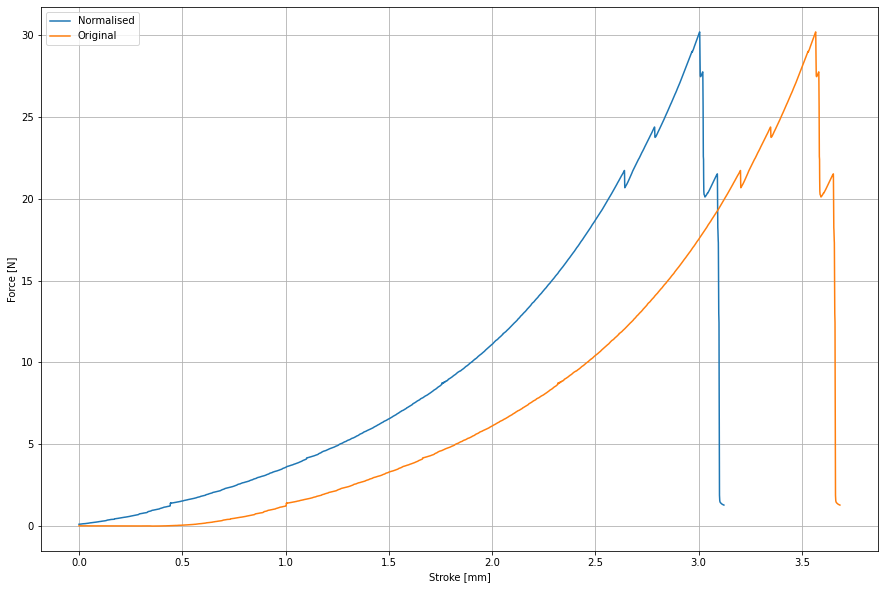

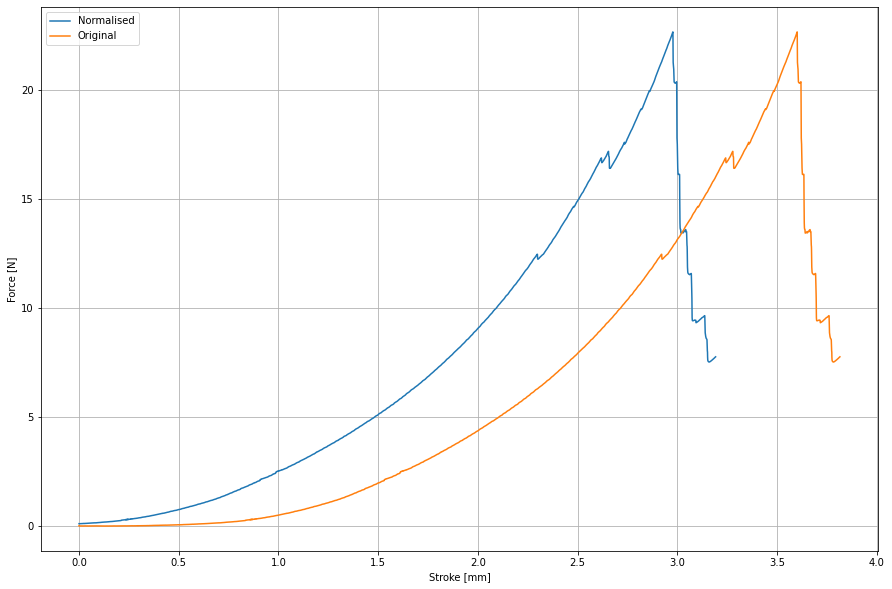

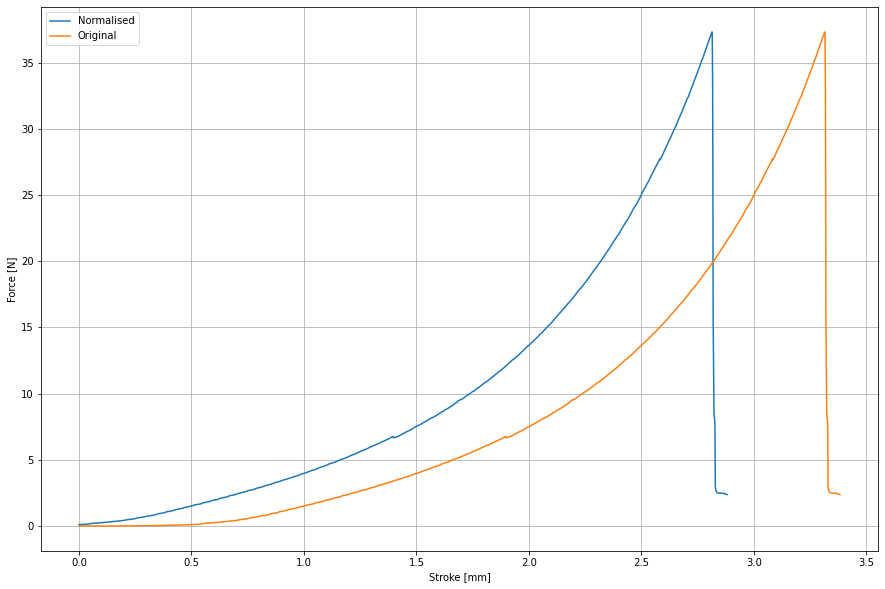

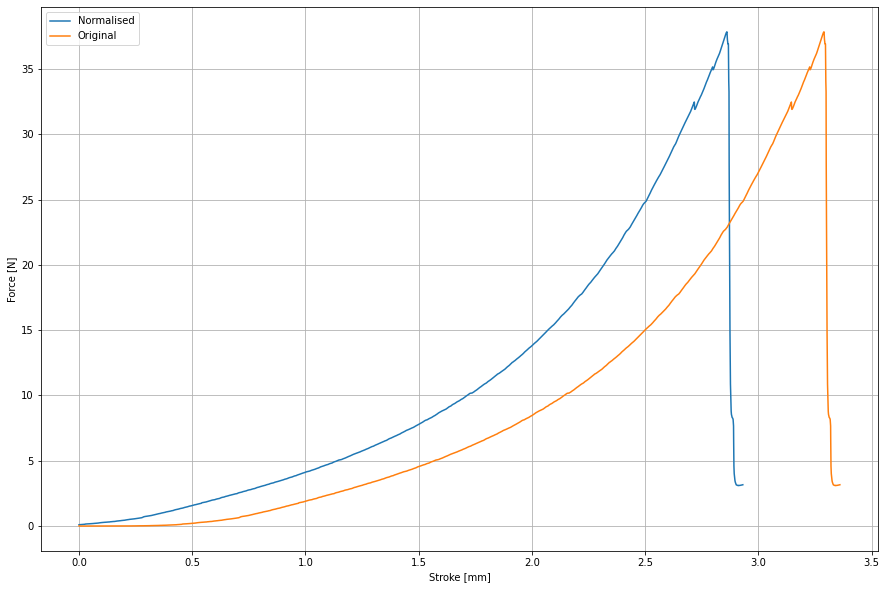

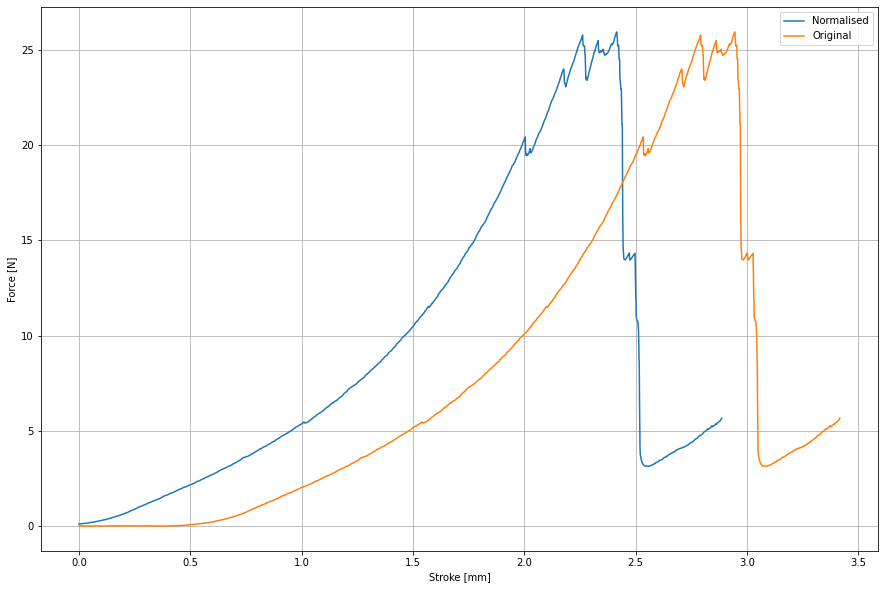

In [14]:
axA = GelMA26_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA26.plot(ax = axA, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axB = GelMA27_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA27.plot(ax = axB, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axC = GelMA28_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA28.plot(ax = axC, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axD = GelMA29_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA29.plot(ax = axD, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axE = GelMA30_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA30.plot(ax = axE, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
#plt.savefig("GelMA only.png")
plt.show()


### Plotting Stress and Strain Normalised 

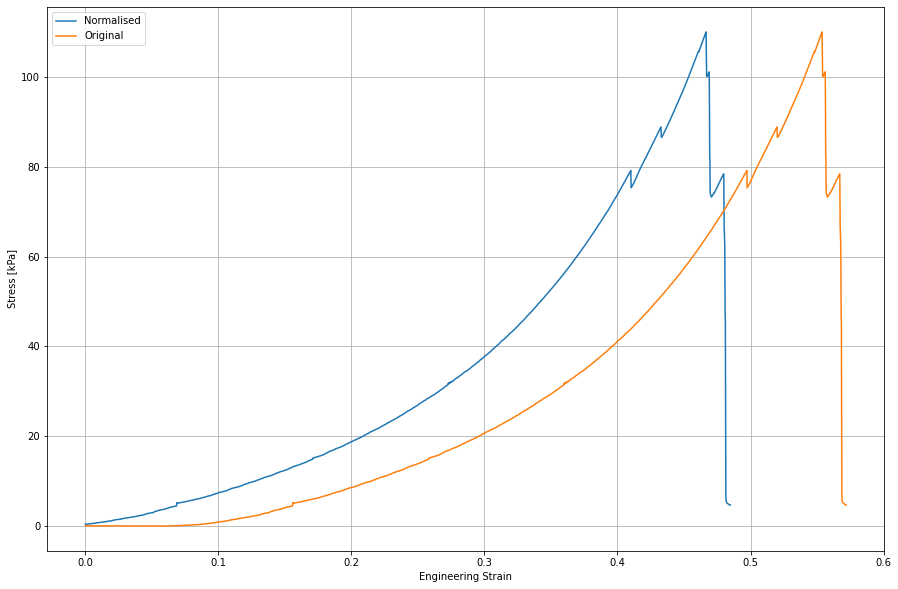

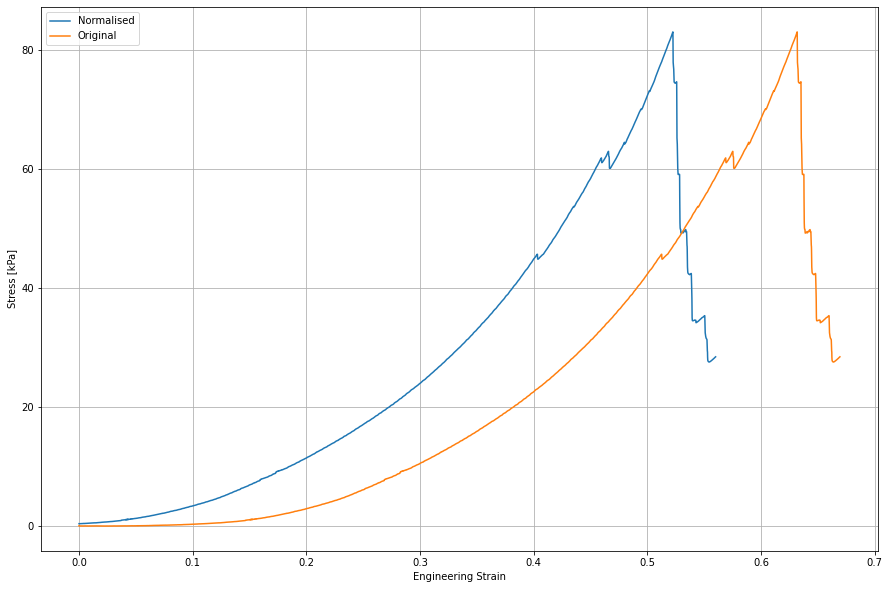

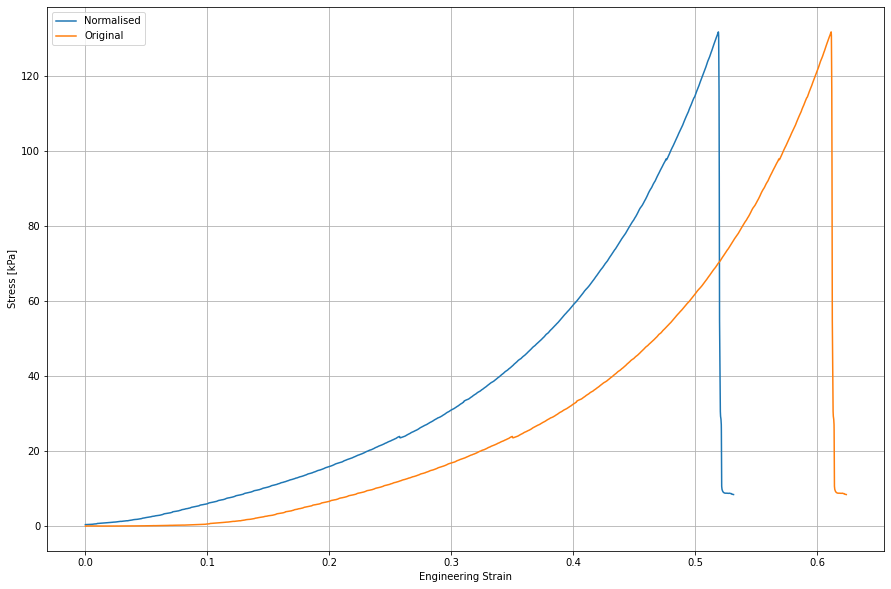

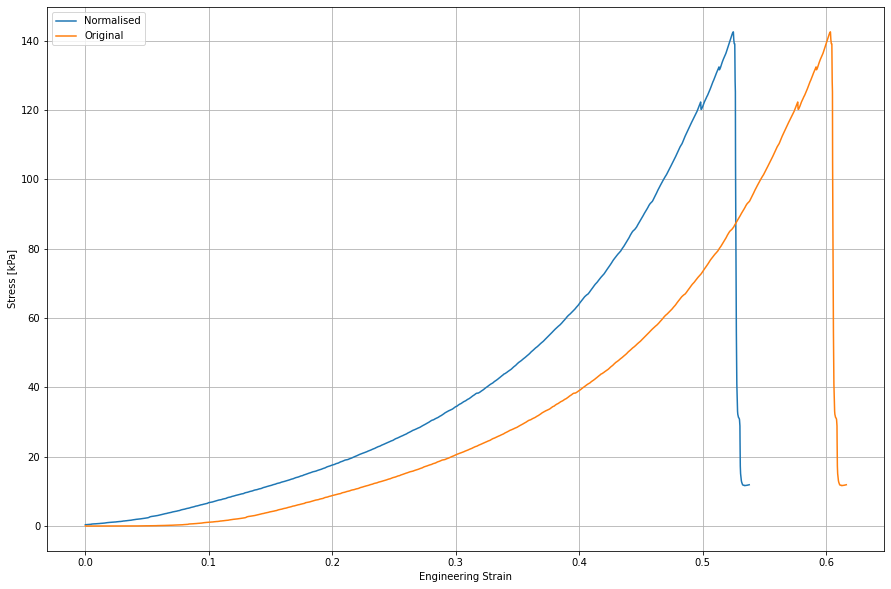

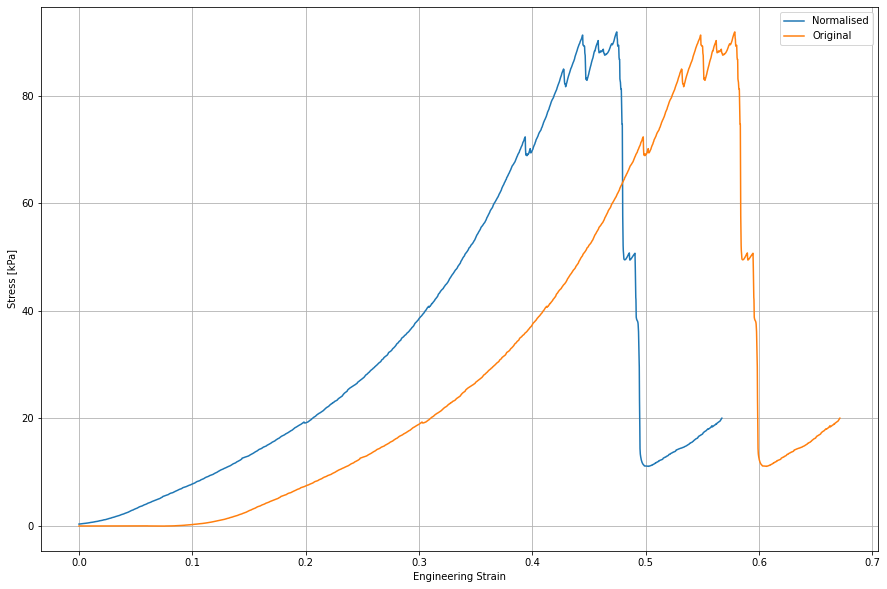

In [15]:
ax = GelMA26_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA26.plot(ax = ax, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
#plt.savefig("squares.png")
plt.show()

ax1 = GelMA27_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA27.plot(ax = ax1, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
#plt.savefig("squares.png")
plt.show()

ax2 = GelMA28_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA28.plot(ax = ax2, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
#plt.savefig("squares.png")
plt.show()

ax3 = GelMA29_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA29.plot(ax = ax3, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
#plt.savefig("squares.png")
plt.show()

ax4 = GelMA30_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA30.plot(ax = ax4, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
#plt.savefig("GelMA only.png")
plt.show()


## All Graphs of GelMA only (Normalised)_Non-max-cut 

### Force Stroke Plots (All)_Non-cut

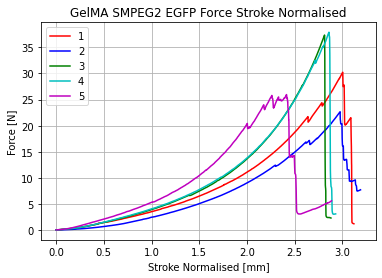

In [16]:
plt.plot(GelMA26_cut['Stroke Normalised'],GelMA26_cut['Force [N]'],color = 'r')
plt.plot(GelMA27_cut['Stroke Normalised'],GelMA27_cut['Force [N]'],color = 'b')
plt.plot(GelMA28_cut['Stroke Normalised'],GelMA28_cut['Force [N]'],color = 'g')
plt.plot(GelMA29_cut['Stroke Normalised'],GelMA29_cut['Force [N]'],color = 'c')
plt.plot(GelMA30_cut['Stroke Normalised'],GelMA30_cut['Force [N]'],color = 'm')
plt.grid()
plt.legend('12345')
plt.title('GelMA SMPEG2 EGFP Force Stroke Normalised')
plt.xlabel('Stroke Normalised [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA EGFP_FS_Non-max-cut.png")
plt.show()

### Stress Strain Plots (All)_Non-cut

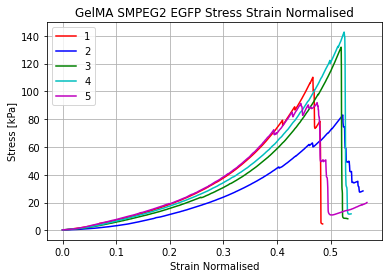

In [17]:
plt.plot(GelMA26_cut['Strain Normalised'],GelMA26_cut['Stress [kPa]'],color = 'r')
plt.plot(GelMA27_cut['Strain Normalised'],GelMA27_cut['Stress [kPa]'],color = 'b')
plt.plot(GelMA28_cut['Strain Normalised'],GelMA28_cut['Stress [kPa]'],color = 'g')
plt.plot(GelMA29_cut['Strain Normalised'],GelMA29_cut['Stress [kPa]'],color = 'c')
plt.plot(GelMA30_cut['Strain Normalised'],GelMA30_cut['Stress [kPa]'],color = 'm')
plt.grid()
plt.legend('12345')
plt.title('GelMA SMPEG2 EGFP Stress Strain Normalised')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [kPa]')
#plt.savefig("GelMA EGFP_SS_Non-max-cut.png")
plt.show()

#norm_GelMA_Only = {'GelMA31_norm':GelMA31_cut['Strain Normalised'],
#                   'GelMA32_norm':GelMA32_cut['Strain Normalised'],
#                   'GelMA33_norm':GelMA33_cut['Strain Normalised'],
#                   'GelM34_norm':GelMA34_cut['Strain Normalised'],
#                   'GelMA35_norm':GelMA35_cut['Strain Normalised']}

#df_only = pd.DataFrame(norm_GelMA_Only)

#print(df_only)

In [18]:
GelMA30_cut

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised
3181,31.81,0.100136,0.530100,0.104145,354.668668,0.354669,0.000000,0.000000
3182,31.82,0.100533,0.530300,0.104185,356.076210,0.356076,0.000039,0.000200
3183,31.83,0.100931,0.530467,0.104217,357.483398,0.357483,0.000072,0.000367
3184,31.84,0.101487,0.530633,0.104250,359.453744,0.359454,0.000105,0.000533
3185,31.85,0.101725,0.530833,0.104289,360.298482,0.360298,0.000144,0.000733
...,...,...,...,...,...,...,...,...
20503,205.03,5.645752,3.417167,0.671349,19996.558116,19.996558,0.567204,2.887067
20504,205.04,5.647977,3.417300,0.671375,20004.438792,20.004439,0.567230,2.887200
20505,205.05,5.650123,3.417467,0.671408,20012.039660,20.012040,0.567263,2.887367
20506,205.06,5.653461,3.417600,0.671434,20023.862445,20.023862,0.567289,2.887500


## Max cutting

### GelM26 Force and Stress

In [19]:
maxForceIndex26 = float(GelMA26_cut['Force [N]'].idxmax()) #position
maxStrokeIndex26 = float(GelMA26_cut['Stroke [mm]'].idxmax())

GelMA26_cut_max_FS = GelMA26_cut.loc[0:maxForceIndex26, 'Force [N]']

GelMA26_cut['Force Cut Max FS'] = GelMA26_cut_max_FS
GelMA26_cut

##Stress

maxStressIndex26 = float(GelMA26_cut['Stress [kPa]'].idxmax())
maxStrainIndex26 = float(GelMA26_cut['Strain Normalised'].idxmax())
 
GelMA26_cut_max_SS = GelMA26_cut.loc[0:maxStressIndex26, 'Stress [kPa]']

GelMA26_cut['Stress Cut Max SS'] = GelMA26_cut_max_SS

GelMA26_cut

#GelMA26_cut.drop('Stroke Normalised Max FS', axis=1, inplace=True)
#GelMA26_cut.drop('Strain Normalised Max SS', axis=1, inplace=True)

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2162/4157604861.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA26_cut['Force Cut Max FS'] = GelMA26_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2162/4157604861.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA26_cut['Stress Cut Max SS'] = GelMA26_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
3370,33.70,0.100136,0.561633,0.087210,364.989934,0.364990,0.000000,0.000000,0.100136,0.364990
3374,33.74,0.100772,0.562267,0.087308,367.307393,0.367307,0.000098,0.000633,0.100772,0.367307
3375,33.75,0.101725,0.562467,0.087340,370.783582,0.370784,0.000129,0.000833,0.101725,0.370784
3376,33.76,0.102282,0.562633,0.087365,372.811267,0.372811,0.000155,0.001000,0.102282,0.372811
3377,33.77,0.102123,0.562833,0.087396,372.231720,0.372232,0.000186,0.001200,0.102123,0.372232
...,...,...,...,...,...,...,...,...,...,...
22099,220.99,1.272360,3.683133,0.571915,4637.687948,4.637688,0.484705,3.121500,NaN,NaN
22100,221.00,1.271566,3.683300,0.571941,4634.793858,4.634794,0.484731,3.121667,NaN,NaN
22101,221.01,1.271804,3.683467,0.571967,4635.661356,4.635661,0.484757,3.121834,NaN,NaN
22102,221.02,1.272917,3.683567,0.571982,4639.718185,4.639718,0.484772,3.121934,NaN,NaN


### GelMA27 Force and Stress

In [20]:
maxForceIndex27 = float(GelMA27_cut['Force [N]'].idxmax()) #position
maxStrokeIndex27 = float(GelMA27_cut['Stroke [mm]'].idxmax())

GelMA27_cut_max_FS = GelMA27_cut.loc[0:maxForceIndex27, 'Force [N]']

GelMA27_cut['Force Cut Max FS'] = GelMA27_cut_max_FS
GelMA27_cut

##Stress

maxStressIndex27 = float(GelMA27_cut['Stress [kPa]'].idxmax())
maxStrainIndex27 = float(GelMA27_cut['Strain Normalised'].idxmax())
 
GelMA27_cut_max_SS = GelMA27_cut.loc[0:maxStressIndex27, 'Stress [kPa]']

GelMA27_cut['Stress Cut Max SS'] = GelMA27_cut_max_SS

GelMA27_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2162/4094920171.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA27_cut['Force Cut Max FS'] = GelMA27_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2162/4094920171.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA27_cut['Stress Cut Max SS'] = GelMA27_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
3739,37.39,0.100533,0.623133,0.109322,368.011977,0.368012,0.000000,0.000000,0.100533,0.368012
3740,37.40,0.100136,0.623300,0.109351,366.557254,0.366557,0.000029,0.000167,0.100136,0.366557
3756,37.56,0.100692,0.626000,0.109825,368.593646,0.368594,0.000503,0.002867,0.100692,0.368594
3757,37.57,0.101646,0.626133,0.109848,372.084762,0.372085,0.000526,0.003000,0.101646,0.372085
3758,37.58,0.102043,0.626300,0.109877,373.539485,0.373539,0.000556,0.003167,0.102043,0.373539
...,...,...,...,...,...,...,...,...,...,...
22886,228.86,7.756948,3.814300,0.669175,28395.095027,28.395095,0.559854,3.191167,NaN,NaN
22887,228.87,7.757902,3.814467,0.669205,28398.587241,28.398587,0.559883,3.191334,NaN,NaN
22888,228.88,7.758459,3.814633,0.669234,28400.626196,28.400626,0.559912,3.191500,NaN,NaN
22889,228.89,7.759094,3.814767,0.669257,28402.950678,28.402951,0.559936,3.191634,NaN,NaN


### GelMA2 8Force and Stress

In [21]:
maxForceIndex28 = float(GelMA28_cut['Force [N]'].idxmax()) #position
maxStrokeIndex28 = float(GelMA28_cut['Stroke [mm]'].idxmax())

GelMA28_cut_max_FS = GelMA28_cut.loc[0:maxForceIndex28, 'Force [N]']

GelMA28_cut['Force Cut Max FS'] = GelMA28_cut_max_FS
GelMA28_cut

##Stress

maxStressIndex28 = float(GelMA28_cut['Stress [kPa]'].idxmax())
maxStrainIndex28 = float(GelMA28_cut['Strain Normalised'].idxmax())

GelMA28_cut_max_SS = GelMA28_cut.loc[0:maxStressIndex28, 'Stress [kPa]']

GelMA28_cut['Stress Cut Max SS'] = GelMA28_cut_max_SS

GelMA28_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2162/2339264426.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA28_cut['Force Cut Max FS'] = GelMA28_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2162/2339264426.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA28_cut['Stress Cut Max SS'] = GelMA28_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
3008,30.08,0.100295,0.501267,0.092485,354.109985,0.354110,0.000000,0.000000,0.100295,0.354110
3009,30.09,0.100295,0.501433,0.092515,354.109985,0.354110,0.000031,0.000167,0.100295,0.354110
3012,30.12,0.101169,0.501933,0.092608,357.196871,0.357197,0.000123,0.000667,0.101169,0.357197
3013,30.13,0.102441,0.502100,0.092638,361.686150,0.361686,0.000154,0.000833,0.102441,0.361686
3014,30.14,0.102520,0.502267,0.092669,361.966840,0.361967,0.000184,0.001000,0.102520,0.361967
...,...,...,...,...,...,...,...,...,...,...
20294,202.94,2.374093,3.382267,0.624035,8382.198026,8.382198,0.531550,2.881000,NaN,NaN
20295,202.95,2.374411,3.382433,0.624065,8383.320787,8.383321,0.531580,2.881166,NaN,NaN
20296,202.96,2.374411,3.382567,0.624090,8383.320787,8.383321,0.531605,2.881300,NaN,NaN
20297,202.97,2.373695,3.382667,0.624108,8380.792810,8.380793,0.531624,2.881400,NaN,NaN


### GelMA29 Force and Stress

In [23]:
maxForceIndex29 = float(GelMA29_cut['Force [N]'].idxmax()) #position
maxStrokeIndex29 = float(GelMA29_cut['Stroke [mm]'].idxmax())

GelMA29_cut_max_FS = GelMA29_cut.loc[0:maxForceIndex29, 'Force [N]']

GelMA29_cut['Force Cut Max FS'] = GelMA29_cut_max_FS
GelMA29_cut

##Stress

maxStressIndex29 = float(GelMA29_cut['Stress [kPa]'].idxmax())
maxStrainIndex29 = float(GelMA29_cut['Strain Normalised'].idxmax())
 
GelMA29_cut_max_SS = GelMA29_cut.loc[0:maxStressIndex29, 'Stress [kPa]']

GelMA29_cut['Stress Cut Max SS'] = GelMA29_cut_max_SS

GelMA29_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2162/46582265.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA29_cut['Force Cut Max FS'] = GelMA29_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2162/46582265.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA29_cut['Stress Cut Max SS'] = GelMA29_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
2572,25.72,0.100136,0.428600,0.078642,376.995383,0.376995,0.000000,0.000000,0.100136,0.376995
2573,25.73,0.100374,0.428800,0.078679,377.892922,0.377893,0.000037,0.000200,0.100374,0.377893
2574,25.74,0.100931,0.428967,0.078709,379.987303,0.379987,0.000067,0.000367,0.100931,0.379987
2575,25.75,0.101089,0.429100,0.078734,380.585912,0.380586,0.000092,0.000500,0.101089,0.380586
2580,25.80,0.102123,0.429967,0.078893,384.475370,0.384475,0.000251,0.001367,0.102123,0.384475
...,...,...,...,...,...,...,...,...,...,...
20154,201.54,3.160397,3.358933,0.616318,11898.392770,11.898393,0.537676,2.930333,NaN,NaN
20155,201.55,3.160556,3.359100,0.616349,11898.991380,11.898991,0.537706,2.930500,NaN,NaN
20156,201.56,3.160715,3.359267,0.616379,11899.589989,11.899590,0.537737,2.930667,NaN,NaN
20157,201.57,3.161510,3.359400,0.616404,11902.583038,11.902583,0.537761,2.930800,NaN,NaN


### GelMA30 Force and Stress 

In [24]:
maxForceIndex30 = float(GelMA30_cut['Force [N]'].idxmax()) #position
maxStrokeIndex30 = float(GelMA30_cut['Stroke [mm]'].idxmax())

GelMA30_cut_max_FS = GelMA30_cut.loc[0:maxForceIndex30, 'Force [N]']

GelMA30_cut['Force Cut Max FS'] = GelMA30_cut_max_FS
GelMA30_cut

##Stress

maxStressIndex30 = float(GelMA30_cut['Stress [kPa]'].idxmax())
maxStrainIndex30 = float(GelMA30_cut['Strain Normalised'].idxmax())
 
GelMA30_cut_max_SS = GelMA30_cut.loc[0:maxStressIndex30, 'Stress [kPa]']

GelMA30_cut['Stress Cut Max SS'] = GelMA30_cut_max_SS

GelMA30_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2162/718328029.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA30_cut['Force Cut Max FS'] = GelMA30_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2162/718328029.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA30_cut['Stress Cut Max SS'] = GelMA30_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
3181,31.81,0.100136,0.530100,0.104145,354.668668,0.354669,0.000000,0.000000,0.100136,0.354669
3182,31.82,0.100533,0.530300,0.104185,356.076210,0.356076,0.000039,0.000200,0.100533,0.356076
3183,31.83,0.100931,0.530467,0.104217,357.483398,0.357483,0.000072,0.000367,0.100931,0.357483
3184,31.84,0.101487,0.530633,0.104250,359.453744,0.359454,0.000105,0.000533,0.101487,0.359454
3185,31.85,0.101725,0.530833,0.104289,360.298482,0.360298,0.000144,0.000733,0.101725,0.360298
...,...,...,...,...,...,...,...,...,...,...
20503,205.03,5.645752,3.417167,0.671349,19996.558116,19.996558,0.567204,2.887067,NaN,NaN
20504,205.04,5.647977,3.417300,0.671375,20004.438792,20.004439,0.567230,2.887200,NaN,NaN
20505,205.05,5.650123,3.417467,0.671408,20012.039660,20.012040,0.567263,2.887367,NaN,NaN
20506,205.06,5.653461,3.417600,0.671434,20023.862445,20.023862,0.567289,2.887500,NaN,NaN


In [25]:
GelMA30_cut

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
3181,31.81,0.100136,0.530100,0.104145,354.668668,0.354669,0.000000,0.000000,0.100136,0.354669
3182,31.82,0.100533,0.530300,0.104185,356.076210,0.356076,0.000039,0.000200,0.100533,0.356076
3183,31.83,0.100931,0.530467,0.104217,357.483398,0.357483,0.000072,0.000367,0.100931,0.357483
3184,31.84,0.101487,0.530633,0.104250,359.453744,0.359454,0.000105,0.000533,0.101487,0.359454
3185,31.85,0.101725,0.530833,0.104289,360.298482,0.360298,0.000144,0.000733,0.101725,0.360298
...,...,...,...,...,...,...,...,...,...,...
20503,205.03,5.645752,3.417167,0.671349,19996.558116,19.996558,0.567204,2.887067,NaN,NaN
20504,205.04,5.647977,3.417300,0.671375,20004.438792,20.004439,0.567230,2.887200,NaN,NaN
20505,205.05,5.650123,3.417467,0.671408,20012.039660,20.012040,0.567263,2.887367,NaN,NaN
20506,205.06,5.653461,3.417600,0.671434,20023.862445,20.023862,0.567289,2.887500,NaN,NaN


## Plots of Max cutting 

### Force Stroke Plots (All)_Cut

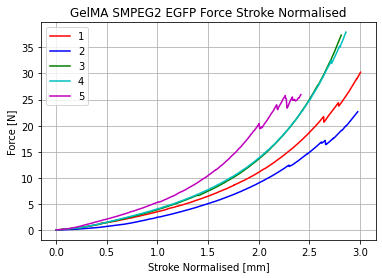

In [26]:
plt.plot(GelMA26_cut['Stroke Normalised'],GelMA26_cut['Force Cut Max FS'],color = 'r')
plt.plot(GelMA27_cut['Stroke Normalised'],GelMA27_cut['Force Cut Max FS'],color = 'b')
plt.plot(GelMA28_cut['Stroke Normalised'],GelMA28_cut['Force Cut Max FS'],color = 'g')
plt.plot(GelMA29_cut['Stroke Normalised'],GelMA29_cut['Force Cut Max FS'],color = 'c')
plt.plot(GelMA30_cut['Stroke Normalised'],GelMA30_cut['Force Cut Max FS'],color = 'm')
plt.grid()
plt.legend('12345')
plt.title('GelMA SMPEG2 EGFP Force Stroke Normalised')
plt.xlabel('Stroke Normalised [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA EGFP_FS_Cut.png")
plt.show()

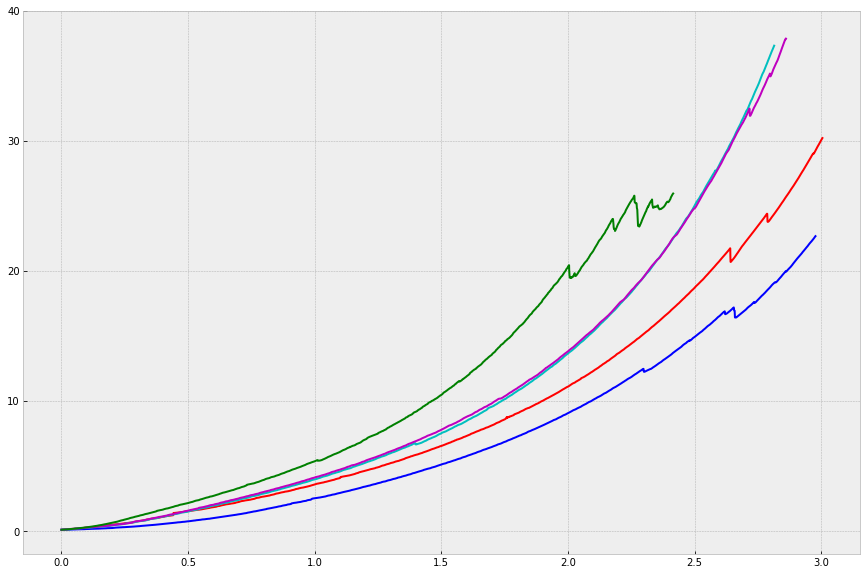

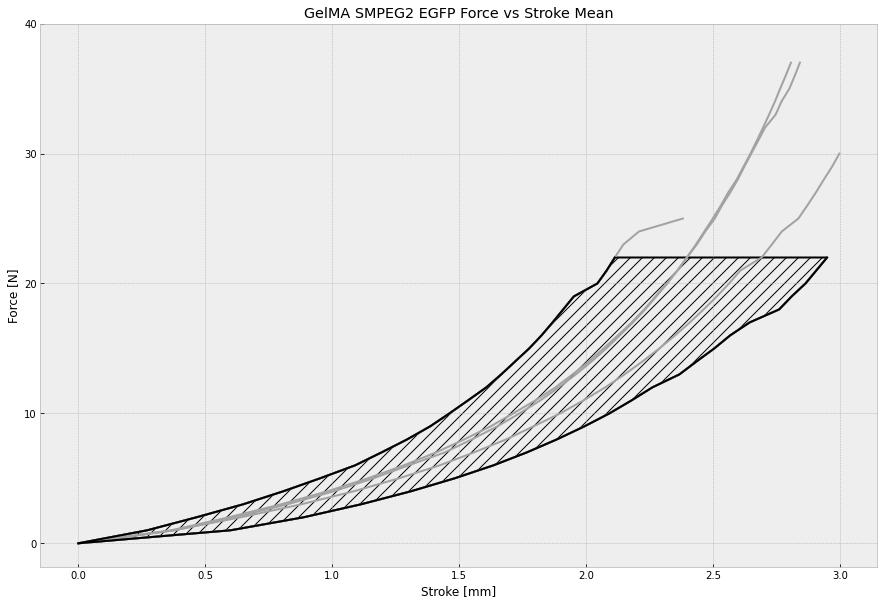

,xmin,xmax,y_common
0,0.000000,0.000000,0.000000
1,0.270773,0.599541,1.000033
2,0.464803,0.887141,2.000067
3,0.648741,1.113329,3.000100
4,0.806611,1.309674,4.000133
...,...,...,...
29995,NaN,NaN,29995.999867
29996,NaN,NaN,29996.999900
29997,NaN,NaN,29997.999933
29998,NaN,NaN,29998.999967


In [27]:
d1 = GelMA26_cut['Stroke Normalised']
d2 = GelMA27_cut['Stroke Normalised']
d3 = GelMA28_cut['Stroke Normalised']
d4 = GelMA29_cut['Stroke Normalised']
d5 = GelMA30_cut['Stroke Normalised']

y1 = GelMA26_cut['Force Cut Max FS']
y2 = GelMA27_cut['Force Cut Max FS']
y3 = GelMA28_cut['Force Cut Max FS']
y4 = GelMA29_cut['Force Cut Max FS']
y5 = GelMA30_cut['Force Cut Max FS']

y_common = np.linspace(0,30000,30000)

x1 = np.interp(y_common,y1,d1)
x2 = np.interp(y_common,y2,d2)
x3 = np.interp(y_common,y3,d3)
x4 = np.interp(y_common,y4,d4)
x5 = np.interp(y_common,y5,d5)

x = np.stack((x1,x2,x3,x4,x5))

xmax = np.max(x,axis=0)
xmin = np.min(x,axis=0)

%matplotlib inline
plt.style.use('bmh')
fig = plt.figure(figsize=(15,10))

plt.plot(d1,y1,'red')
plt.plot(d2,y2,'blue')
plt.plot(d3,y3,'c')
plt.plot(d4,y4,'m')
plt.plot(d5,y5,'green')

plt.xticks(np.arange(0,3.1,0.5))
plt.yticks(np.arange(0,41,10))

plt.show()



fig = plt.figure(figsize=(15,10))

plt.plot(x1,y_common,'#A2A2A2')
plt.plot(x2,y_common,'#A2A2A2')
plt.plot(x3,y_common,'#A2A2A2')
plt.plot(x4,y_common,'#A2A2A2')
plt.plot(x5,y_common,'#A2A2A2')

plt.plot(xmax,y_common,'black')
plt.plot(xmin,y_common,'black')

plt.rcParams['hatch.color'] = 'black'
plt.fill_betweenx(y_common, xmax, xmin, facecolor='none', hatch ='//', edgecolor='black', linewidth=2)

plt.xticks(np.arange(0,3.1,0.5))
plt.yticks(np.arange(0,41,10))

plt.title('GelMA SMPEG2 EGFP Force vs Stroke Mean')
plt.xlabel('Stroke [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA EGFP_FS_Cut_Mean.png")

plt.show()

GelMA_EGFP_FS = {'xmin':xmin,
                  'xmax':xmax,
                'y_common':y_common}

GelMA_EGFP_FS_M = pd.DataFrame(GelMA_EGFP_FS) 

GelMA_EGFP_FS_M

#GelMA_EGFP_FS_M.to_csv('GelMA_EGFP_FS_M.csv')

### Stress Strain Plots (All)_Cut

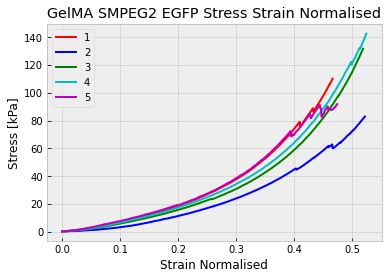

In [28]:
plt.plot(GelMA26_cut['Strain Normalised'],GelMA26_cut['Stress Cut Max SS'],color = 'r')
plt.plot(GelMA27_cut['Strain Normalised'],GelMA27_cut['Stress Cut Max SS'],color = 'b')
plt.plot(GelMA28_cut['Strain Normalised'],GelMA28_cut['Stress Cut Max SS'],color = 'g')
plt.plot(GelMA29_cut['Strain Normalised'],GelMA29_cut['Stress Cut Max SS'],color = 'c')
plt.plot(GelMA30_cut['Strain Normalised'],GelMA30_cut['Stress Cut Max SS'],color = 'm')
plt.grid(visible = True)
plt.legend('12345')
plt.title('GelMA SMPEG2 EGFP Stress Strain Normalised')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [kPa]')
#plt.savefig("GelMA EGFP_SS_Cut.png")
plt.show()

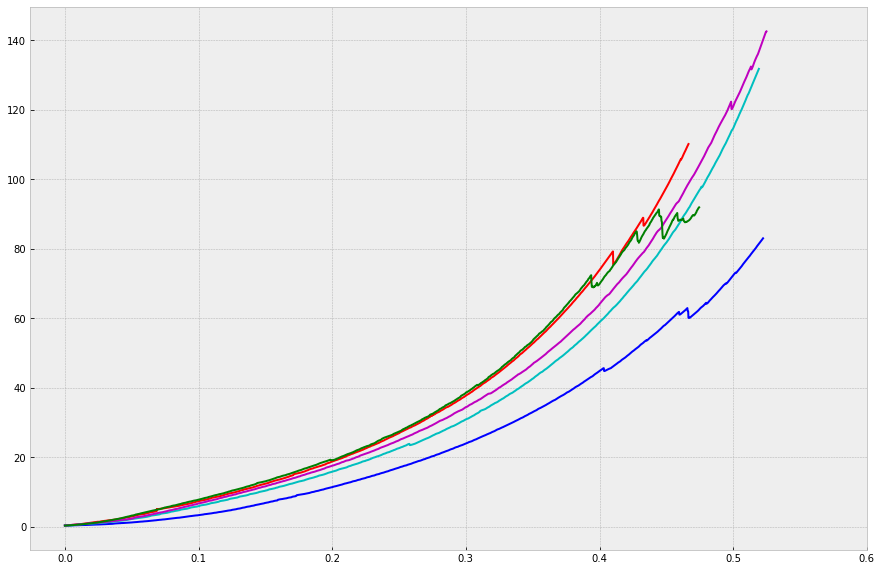

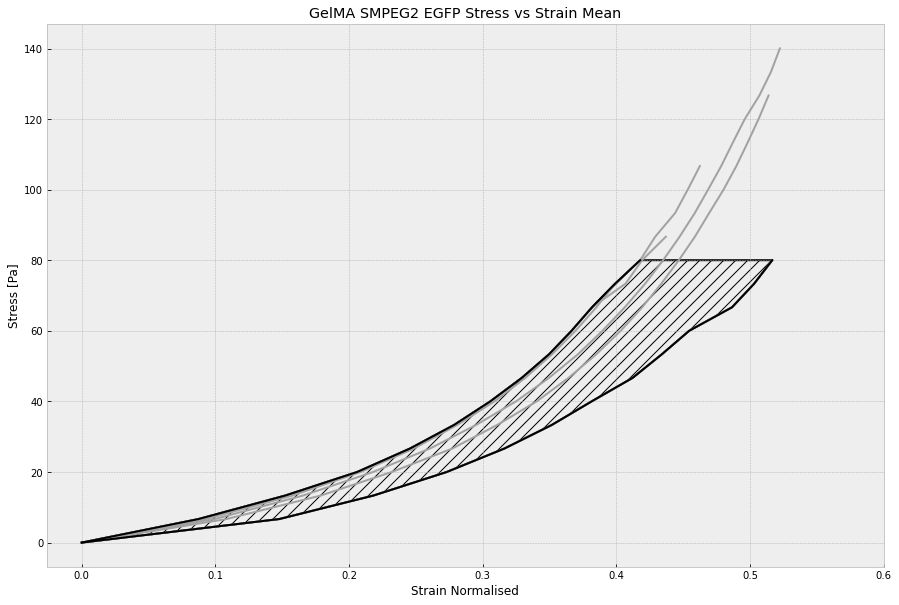

In [29]:
d6 = GelMA26_cut['Strain Normalised']
d7 = GelMA27_cut['Strain Normalised']
d8 = GelMA28_cut['Strain Normalised']
d9 = GelMA29_cut['Strain Normalised']
d10 = GelMA30_cut['Strain Normalised']

y6 = GelMA26_cut['Stress Cut Max SS']
y7 = GelMA27_cut['Stress Cut Max SS']
y8 = GelMA28_cut['Stress Cut Max SS']
y9 = GelMA29_cut['Stress Cut Max SS']
y10 = GelMA30_cut['Stress Cut Max SS']

#y_common_2 = np.linspace(0,3000000,30000) #Pa
y_common_2 = np.linspace(0,20000,3000) #kPa

x6 = np.interp(y_common_2,y6,d6)
x7 = np.interp(y_common_2,y7,d7)
x8 = np.interp(y_common_2,y8,d8)
x9 = np.interp(y_common_2,y9,d9)
x10 = np.interp(y_common_2,y10,d10)

x_2 = np.stack((x6,x7,x8,x9,x10))

xmax_2 = np.max(x_2,axis=0)
xmin_2 = np.min(x_2,axis=0)

%matplotlib inline
plt.style.use('bmh')
fig = plt.figure(figsize=(15,10))

plt.plot(d6,y6,'red')
plt.plot(d7,y7,'blue')
plt.plot(d8,y8,'c')
plt.plot(d9,y9,'m')
plt.plot(d10,y10,'green')

#plt.xticks(np.arange(0,0.56,0.1))
#plt.yticks(np.arange(0,160100,20000))

plt.xticks(np.arange(0,0.65,0.1))
plt.yticks(np.arange(0,160,20))

plt.show()



fig = plt.figure(figsize=(15,10))

plt.plot(x6,y_common_2,'#A2A2A2')
plt.plot(x7,y_common_2,'#A2A2A2')
plt.plot(x8,y_common_2,'#A2A2A2')
plt.plot(x9,y_common_2,'#A2A2A2')
plt.plot(x10,y_common_2,'#A2A2A2')

plt.plot(xmax_2,y_common_2,'black')
plt.plot(xmin_2,y_common_2,'black')

plt.rcParams['hatch.color'] = 'black'
plt.fill_betweenx(y_common_2, xmax_2, xmin_2, facecolor='none', hatch ='//', edgecolor='black', linewidth=2)

#plt.xticks(np.arange(0,0.56,0.1))
#plt.yticks(np.arange(0,160100,20000))

plt.xticks(np.arange(0,0.65,0.1))
plt.yticks(np.arange(0,160,20))

plt.title('GelMA SMPEG2 EGFP Stress vs Strain Mean')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [Pa]')
plt.savefig("GelMA EGFP_SS_Cut_Mean.png")

plt.show()

GelMA_EGFP_SS = {'xmin':xmin_2,
                  'xmax':xmax_2,
                'y_common':y_common_2}

GelMA_EGFP_SS_M = pd.DataFrame(GelMA_EGFP_SS) 

GelMA_EGFP_SS_M

GelMA_EGFP_SS_M.to_csv('GelMA_EGFP_SS_M.csv')

## Mean of the samples 

### Force_stroke Mean 

In [47]:
All_GelMA_force = {'GelMA26':GelMA26_cut['Force Cut Max FS'], 
                     'GelMA27':GelMA27_cut['Force Cut Max FS'], 
                     'GelMA28':GelMA28_cut['Force Cut Max FS'], 
                     'GelMA29':GelMA29_cut['Force Cut Max FS'],
                    'GelMA30':GelMA30_cut['Force Cut Max FS']}

All_GelMA_stroke = {'GelMA26':GelMA26_cut['Stroke Normalised'], 
                     'GelMA27':GelMA27_cut['Stroke Normalised'], 
                     'GelMA28':GelMA28_cut['Stroke Normalised'], 
                     'GelMA29':GelMA29_cut['Stroke Normalised'],
                    'GelMA30':GelMA30_cut['Stroke Normalised']}

All_GelMA_force
All_GelMA_stroke

df6_force = pd.DataFrame (data = All_GelMA_force)
df6_stroke = pd.DataFrame (data = All_GelMA_stroke)

from numpy import array
from math import nan, isnan

#F1.to_csv('F1_EGFP.csv')
#Strk1.to_csv('Strk1_EGFP.csv')

df6_force['s26'] = df6_stroke['GelMA26']
df6_force['s27'] = df6_stroke['GelMA27']
df6_force['s28'] = df6_stroke['GelMA28']
df6_force['s29'] = df6_stroke['GelMA29']
df6_force['s30'] = df6_stroke['GelMA30']

df6_force


,GelMA26,GelMA27,GelMA28,GelMA29,GelMA30,s26,s27,s28,s29,s30
2572,NaN,NaN,NaN,0.100136,NaN,NaN,NaN,NaN,0.000000,NaN
2573,NaN,NaN,NaN,0.100374,NaN,NaN,NaN,NaN,0.000200,NaN
2574,NaN,NaN,NaN,0.100931,NaN,NaN,NaN,NaN,0.000367,NaN
2575,NaN,NaN,NaN,0.101089,NaN,NaN,NaN,NaN,0.000500,NaN
2580,NaN,NaN,NaN,0.102123,NaN,NaN,NaN,NaN,0.001367,NaN
...,...,...,...,...,...,...,...,...,...,...
22886,NaN,NaN,NaN,NaN,NaN,NaN,3.191167,NaN,NaN,NaN
22887,NaN,NaN,NaN,NaN,NaN,NaN,3.191334,NaN,NaN,NaN
22888,NaN,NaN,NaN,NaN,NaN,NaN,3.191500,NaN,NaN,NaN
22889,NaN,NaN,NaN,NaN,NaN,NaN,3.191634,NaN,NaN,NaN


In [61]:
#Force
from math import nan, isnan

G26 = [x for x in df6_force['GelMA26'] if isnan(x) == False]
G27 = [x for x in df6_force['GelMA27'] if isnan(x) == False]
G28 = [x for x in df6_force['GelMA28'] if isnan(x) == False]
G29 = [x for x in df6_force['GelMA29'] if isnan(x) == False]
G30 = [x for x in df6_force['GelMA30'] if isnan(x) == False]

#Stroke

G31 = [x for x in df6_force['s26'] if isnan(x) == False]
G32 = [x for x in df6_force['s27'] if isnan(x) == False]
G33 = [x for x in df6_force['s28'] if isnan(x) == False]
G34 = [x for x in df6_force['s29'] if isnan(x) == False]
G35 = [x for x in df6_force['s30'] if isnan(x) == False]


dfG26 = pd.DataFrame(G26)
dfG27 = pd.DataFrame(G27)
dfG28 = pd.DataFrame(G28)
dfG29 = pd.DataFrame(G29)
dfG30 = pd.DataFrame(G30)

dfG31 = pd.DataFrame(G31)
dfG32 = pd.DataFrame(G32)
dfG33 = pd.DataFrame(G33)
dfG34 = pd.DataFrame(G34)
dfG35 = pd.DataFrame(G35)


dFONLY = dfG26
dFONLY['27'] = dfG27
dFONLY['28'] = dfG28
dFONLY['29'] = dfG29
dFONLY['30'] = dfG30

dFONLY['31'] = dfG31
dFONLY['32'] = dfG32
dFONLY['33'] = dfG33
dFONLY['34'] = dfG34
dFONLY['35'] = dfG35



dFONLY.columns = ['F26','F27','F28','F29','F30','S26','S27','S28','S29','S30']
dFONLY

#df6 = dFONLY[['F26','F27','F28','F29','F30']]
#ds6 = dFONLY[['S26','S27','S28','S29','S30']]



len(dfG30) #30, shorter one

############# df = df.iloc[row_start:row_end , col_start, col_end]

dFONLY = dFONLY.iloc[0:14492, :]
dFONLY

df6 = dFONLY[['F26','F27','F28','F29','F30']]
ds6 = dFONLY[['S26','S27','S28','S29','S30']]

df6


,F26,F27,F28,F29,F30
0,0.100136,0.100533,0.100295,0.100136,0.100136
1,0.100772,0.100136,0.100295,0.100374,0.100533
2,0.101725,0.100692,0.101169,0.100931,0.100931
3,0.102282,0.101646,0.102441,0.101089,0.101487
4,0.102123,0.102043,0.102520,0.102123,0.101725
...,...,...,...,...,...
14487,17.103510,13.733940,22.493440,22.539850,25.929450
14488,17.106290,13.737600,22.498290,22.543510,25.932950
14489,17.109160,13.741730,22.504090,22.547480,25.936050
14490,17.112260,13.745630,22.510130,22.552730,25.939620


In [62]:
F_dF = array([df6[k] for k in df6]).mean(axis = 0)
S_dF = array([ds6[k] for k in ds6]).mean(axis = 0)


F1 = pd.DataFrame(F_dF) #force
Strk1 = pd.DataFrame(S_dF) #stroke


FStd = array(pd.DataFrame(df6).std(numeric_only = True, axis = 1))
F_nan_std = [x for x in FStd if isnan(x) == False]

StrkStd = array(pd.DataFrame(ds6).std(numeric_only = True, axis = 1))
Strk_nan_std = [x for x in StrkStd if isnan(x) == False]


F1['Std'] = pd.DataFrame(F_nan_std)
F1.columns = ['Mean', 'Std']

Strk1['Std'] = pd.DataFrame(Strk_nan_std)
Strk1.columns = ['Mean', 'Std']



F1['Error1'] = F1['Mean'] - F1['Std']
F1['Error2'] = F1['Mean'] + F1['Std']


Strk1['Error1'] = Strk1['Mean'] - Strk1['Std']
Strk1['Error2'] = Strk1['Mean'] + Strk1['Std']


F1, Strk1

(            Mean       Std     Error1     Error2
 0       0.100247  0.000174   0.100073   0.100421
 1       0.100422  0.000242   0.100180   0.100664
 2       0.101089  0.000393   0.100696   0.101483
 3       0.101789  0.000563   0.101226   0.102352
 4       0.102107  0.000283   0.101824   0.102390
 ...          ...       ...        ...        ...
 14487  20.360038  4.869073  15.490965  25.229111
 14488  20.363728  4.869305  15.494423  25.233033
 14489  20.367702  4.869386  15.498316  25.237088
 14490  20.372074  4.869812  15.502262  25.241886
 14491  20.376062  4.870755  15.505307  25.246817
 
 [14492 rows x 4 columns],
            Mean       Std    Error1    Error2
 0      0.000000  0.000000  0.000000  0.000000
 1      0.000273  0.000202  0.000071  0.000475
 2      0.001020  0.001052 -0.000032  0.002072
 3      0.001173  0.001042  0.000131  0.002216
 4      0.001493  0.000965  0.000529  0.002458
 ...         ...       ...       ...       ...
 14487  2.415440  0.001097  2.414344  2.41

### Stress_Strain Mean 

In [63]:
All_GelMA_stress = {'GelMA26':GelMA26_cut['Stress Cut Max SS'], 
                     'GelMA27':GelMA27_cut['Stress Cut Max SS'], 
                     'GelMA28':GelMA28_cut['Stress Cut Max SS'], 
                     'GelMA29':GelMA29_cut['Stress Cut Max SS'],
                    'GelMA30':GelMA30_cut['Stress Cut Max SS']}

All_GelMA_strain = {'GelMA26':GelMA26_cut['Strain Normalised'], 
                     'GelMA27':GelMA27_cut['Strain Normalised'], 
                     'GelMA28':GelMA28_cut['Strain Normalised'], 
                     'GelMA29':GelMA29_cut['Strain Normalised'],
                    'GelMA30':GelMA30_cut['Strain Normalised']}


All_GelMA_stress
All_GelMA_strain

df6_stress = pd.DataFrame (data = All_GelMA_stress)
df6_strain = pd.DataFrame (data = All_GelMA_strain)

#S1.to_csv('S1_EGFP.csv')
#Strn1.to_csv('Strn1_EGFP.csv')


df6_stress['sn26'] = df6_strain['GelMA26']
df6_stress['sn27'] = df6_strain['GelMA27']
df6_stress['sn28'] = df6_strain['GelMA28']
df6_stress['sn29'] = df6_strain['GelMA29']
df6_stress['sn30'] = df6_strain['GelMA30']

df6_stress

,GelMA26,GelMA27,GelMA28,GelMA29,GelMA30,sn26,sn27,sn28,sn29,sn30
2572,NaN,NaN,NaN,0.376995,NaN,NaN,NaN,NaN,0.000000,NaN
2573,NaN,NaN,NaN,0.377893,NaN,NaN,NaN,NaN,0.000037,NaN
2574,NaN,NaN,NaN,0.379987,NaN,NaN,NaN,NaN,0.000067,NaN
2575,NaN,NaN,NaN,0.380586,NaN,NaN,NaN,NaN,0.000092,NaN
2580,NaN,NaN,NaN,0.384475,NaN,NaN,NaN,NaN,0.000251,NaN
...,...,...,...,...,...,...,...,...,...,...
22886,NaN,NaN,NaN,NaN,NaN,NaN,0.559854,NaN,NaN,NaN
22887,NaN,NaN,NaN,NaN,NaN,NaN,0.559883,NaN,NaN,NaN
22888,NaN,NaN,NaN,NaN,NaN,NaN,0.559912,NaN,NaN,NaN
22889,NaN,NaN,NaN,NaN,NaN,NaN,0.559936,NaN,NaN,NaN


In [64]:
#Stress

G26ss = [x for x in df6_stress['GelMA26'] if isnan(x) == False]
G27ss = [x for x in df6_stress['GelMA27'] if isnan(x) == False]
G28ss = [x for x in df6_stress['GelMA28'] if isnan(x) == False]
G29ss = [x for x in df6_stress['GelMA29'] if isnan(x) == False]
G30ss = [x for x in df6_stress['GelMA30'] if isnan(x) == False]


#Strain

G31ss = [x for x in df6_stress['sn26'] if isnan(x) == False]
G32ss = [x for x in df6_stress['sn27'] if isnan(x) == False]
G33ss = [x for x in df6_stress['sn28'] if isnan(x) == False]
G34ss = [x for x in df6_stress['sn29'] if isnan(x) == False]
G35ss = [x for x in df6_stress['sn30'] if isnan(x) == False]


dfG26ss = pd.DataFrame(G26ss)
dfG27ss = pd.DataFrame(G27ss)
dfG28ss = pd.DataFrame(G28ss)
dfG29ss = pd.DataFrame(G29ss)
dfG30ss = pd.DataFrame(G30ss)

dfG31ss = pd.DataFrame(G31ss)
dfG32ss = pd.DataFrame(G32ss)
dfG33ss = pd.DataFrame(G33ss)
dfG34ss = pd.DataFrame(G34ss)
dfG35ss = pd.DataFrame(G35ss)


dFONLYss = dfG26ss
dFONLYss['27'] = dfG27ss
dFONLYss['28'] = dfG28ss
dFONLYss['29'] = dfG29ss
dFONLYss['30'] = dfG30ss

dFONLYss['31'] = dfG31ss
dFONLYss['32'] = dfG32ss
dFONLYss['33'] = dfG33ss
dFONLYss['34'] = dfG34ss
dFONLYss['35'] = dfG35ss





dFONLYss.columns = ['Ss26','Ss27','Ss28','Ss29','Ss30','Sn26','Sn27','Sn28','Sn29','Sn30']
dFONLYss

#dss6 = dFONLYss[['Ss26','Ss27','Ss28','Ss29','Ss30']]
#dsn6 = dFONLYss[['Sn26','Sn27','Sn28','Sn29','Sn30']]


len(dfG30ss) #30, shorter one

############# df = df.iloc[row_start:row_end , col_start, col_end]

dFONLYss = dFONLYss.iloc[0:14492, :]
dFONLYss

dss6 = dFONLYss[['Ss26','Ss27','Ss28','Ss29','Ss30']]
dsn6 = dFONLYss[['Sn26','Sn27','Sn28','Sn29','Sn30']]

dss6


,Ss26,Ss27,Ss28,Ss29,Ss30
0,0.364990,0.368012,0.354110,0.376995,0.354669
1,0.367307,0.366557,0.354110,0.377893,0.356076
2,0.370784,0.368594,0.357197,0.379987,0.357483
3,0.372811,0.372085,0.361686,0.380586,0.359454
4,0.372232,0.373539,0.361967,0.384475,0.360298
...,...,...,...,...,...
14487,62.341430,50.274481,79.417474,84.858955,91.838918
14488,62.351563,50.287878,79.434598,84.872735,91.851314
14489,62.362024,50.302997,79.455076,84.887681,91.862294
14490,62.373324,50.317273,79.476401,84.907447,91.874939


In [65]:
S_dF = array([dss6[k] for k in dss6]).mean(axis = 0)
Strn_dF = array([dsn6[k] for k in dsn6]).mean(axis = 0)


S1 = pd.DataFrame(S_dF) #stress
Strn1 = pd.DataFrame(Strn_dF) #strain

SStd = array(pd.DataFrame(dss6).std(numeric_only = True, axis = 1))
S_nan_std = [x for x in SStd if isnan(x) == False]

StrnStd = array(pd.DataFrame(dsn6).std(numeric_only = True, axis = 1))
Strn_nan_std = [x for x in StrnStd if isnan(x) == False]


S1['Std'] = pd.DataFrame(S_nan_std)
S1.columns = ['Mean', 'Std']

Strn1['Std'] = pd.DataFrame(Strn_nan_std)
Strn1.columns = ['Mean', 'Std']



S1['Error1'] = S1['Mean'] - S1['Std']
S1['Error2'] = S1['Mean'] + S1['Std']


Strn1['Error1'] = Strn1['Mean'] - Strn1['Std']
Strn1['Error2'] = Strn1['Mean'] + Strn1['Std']

S1

,Mean,Std,Error1,Error2
0,0.363755,0.009625,0.354130,0.373380
1,0.364389,0.009622,0.354767,0.374011
2,0.366809,0.009644,0.357165,0.376453
3,0.369324,0.008694,0.360630,0.378019
4,0.370502,0.009803,0.360699,0.380306
...,...,...,...,...
14487,73.746252,17.058675,56.687577,90.804926
14488,73.759618,17.059327,56.700291,90.818944
14489,73.774014,17.059426,56.714588,90.833441
14490,73.789877,17.060973,56.728904,90.850850


In [67]:
#F1.to_csv('F1_EGFP.csv')
#Strk1.to_csv('Strk1_EGFP.csv')
#S1.to_csv('S1_EGFP.csv')
#Strn1.to_csv('Strn1_EGFP.csv')

## Plotting the stress and force means

### Force_Stroke Mean plotting

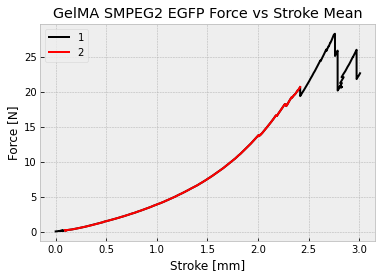

In [36]:
plt.plot(GelMA_stroke_mean, GelMA_force_mean,color = 'k')
plt.plot(GelMA_stroke_mean, F, color= 'r')
plt.grid(visible = True)
plt.legend('12')
plt.title('GelMA SMPEG2 EGFP Force vs Stroke Mean')
plt.xlabel('Stroke [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA EGFP_FS Mean.png")
plt.show()

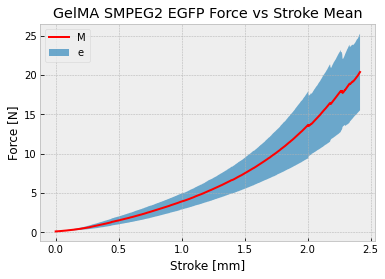

In [58]:
plt.plot(Strk1['Mean'], F1['Mean'], color= 'r')
plt.fill_between(Strk1['Mean'], F1['Error1'], F1['Error2'], alpha = 0.7)
plt.grid(visible = True)
plt.legend('Mean', loc= 'upper left')
plt.title('GelMA SMPEG2 EGFP Force vs Stroke Mean')
plt.xlabel('Stroke [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA EGFP_FS Mean_error.png")
plt.show()

### Stress_Strain Mean plotting 

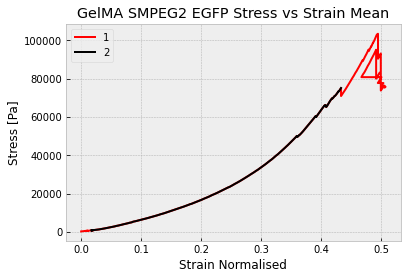

In [39]:
plt.plot(GelMA_strain_mean, GelMA_stress_mean,color = 'r')
plt.plot(GelMA_strain_mean, S,color = 'k')
plt.grid(visible=True)
plt.legend('12')
plt.title('GelMA SMPEG2 EGFP Stress vs Strain Mean')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [Pa]')
#plt.savefig("GelMA EGFP_SS Mean.png")
plt.show()

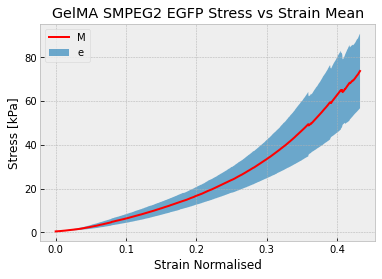

In [59]:
plt.plot(Strn1['Mean'], S1['Mean'], color= 'r')
plt.fill_between(Strn1['Mean'], S1['Error1'], S1['Error2'], alpha = 0.7)
plt.grid(visible=True)
plt.legend('Mean', loc = 'upper left')
plt.title('GelMA SMPEG2 EGFP Stress vs Strain Mean')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [kPa]')
#plt.savefig("GelMA EGFP_SS Mean_error.png")
plt.show()

# Margin of Error

## Force_Stroke Margin Error

In [ ]:
def error_margin_fs (mean):
    a = 0.001/mean #1mm = 0.001m
    return (1 +- a)*mean

In [ ]:
GelMA_EGFP_Error_FS = error_margin_fs(GelMA_stroke_mean)

In [ ]:
df6_GelMA_EGFP_Er = {'GelMA Force Mean':GelMA_force_mean,
                  'GelMA Stroke Mean':GelMA_stroke_mean,
                    'GelMA Error Margin':GelMA_EGFP_Error_FS}

dfF_GelMA_EGFP_Er = {'GelMA Force Mean':F,
                  'GelMA Stroke Mean':GelMA_stroke_mean,
                    'GelMA Error Margin':GelMA_EGFP_Error_FS}

GelMA_EGFP_Er = pd.DataFrame(dfF_GelMA_EGFP_Er) 

GelMA_EGFP_Er

GelMA_EGFP_Er.to_csv('GelMA_EGFP_Er.csv')

GelMA_EGFP_Er

In [ ]:
plt.plot(GelMA_stroke_mean, GelMA_force_mean,color = 'k')
plt.errorbar(GelMA_stroke_mean, GelMA_force_mean, yerr = GelMA_EGFP_Error_FS, fmt = ' ')
plt.errorbar(GelMA_stroke_mean, F, yerr = GelMA_EGFP_Error_FS, fmt = ' ', color = 'r')

plt.grid()
plt.legend('Mean')
plt.title('GelMA SMPEG2 EGFP Force vs Stroke Mean & Error Margin')
plt.xlabel('Stroke [mm]')
plt.ylabel('Force [N]')
plt.savefig("GelMA EGFP_FS Mean_Error.png")
plt.show()

## Stress_Strain Margin Error

In [ ]:
GelMA_D_Mean
GelMA_A_Mean

b= 0.001/GelMA_D_Mean

def error_margin_ss (force):
    from scipy import stats
    a = force/((1+2*b)*GelMA_A_Mean)
    c = force/((1-2*b)*GelMA_A_Mean)
    return (a,c)

In [ ]:
error_margin_ss(S)

In [ ]:
plt.errorbar(GelMA_strain_mean, S, yerr = error_margin_ss(F), fmt = ' ', color = '#A2A2A2', alpha = 0.5)
plt.plot(GelMA_strain_mean, S,color = 'r')

plt.grid()
plt.legend('Mean')
plt.title('GelMA SMPEG2 EGFP Stress vs Strain Mean & Error Margin')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [Pa]')
#plt.savefig("GelMA EGFP_SS Mean.png")
plt.show()